# C5 Problem Set 4: Cloud Physics

## 1) Thermodynamic Diagrams

In this exercise you will analyse the atmopsheric stabilty based on measurements made by radiosonde ascent at 1200 UTC 3 May 1999 for Norman, Oklahoma (OUN) in the central USA.

### Technical instructions
- Make sure you have conda installed (https://docs.conda.io/projects/conda/en/latest/user-guide/install/index.html) 

- Setup the environment from the provided cloudphysics.yml file
    - run ```conda env create --file cloudphysics.yml```
    - add to jupyter kernels using: ```python -m ipykernel install --user --name=cloudphysics```
    - restart jupyter and select cloudphysics kernel
 
- C52019P4T1.txt contains measurements made by the radiosonde ascent.
co
- Thermodynamic diagrams are made using the metpy library (https://unidata.github.io/MetPy/latest/index.html). You will need to familiarise yourself with the provided functions. The provided functionality is for Skew-T log-P diagrams, which are very similar to Tephigrams discussed in the lecture. 

- Note, netPy relies upon the pint library to enforce unit-correctness.<br>Be sure to include * units."unitname" to variables passed to metpy plotting routines.

In [2]:
#Import libraries
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pandas as pd
import numpy as np
import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.plots import Hodograph, SkewT
from metpy.units import pandas_dataframe_to_unit_arrays, units

### Plot the data on a Tephigram chart

In [3]:
#Read sounding data
f = open('C52020P4Q1_input.txt',"r")
lines = f.readlines()
f.close()
p = [float( (lines[i].split(","))[0]) for i in range(1,len(lines)) ] * units.hPa
T = [float( (lines[i].split(","))[1]) for i in range(1,len(lines)) ] * units.degC
Td = [float( (lines[i].split(","))[2]) for i in range(1,len(lines)) ] * units.degC

CAPE =  1127.0779401169648 joule / kilogram
CIN =  -9.740765357214482 joule / kilogram


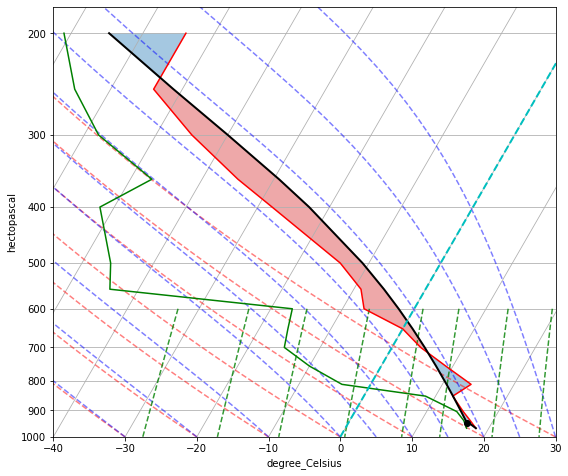

In [4]:
# Calculate the LCL
lcl_pressure, lcl_temperature = mpcalc.lcl(p[0], T[0], Td[0])

# Calculate the parcel profile.
parcel_prof = mpcalc.parcel_profile(p, T[0], Td[0]).to('degC')

# Calculate CAPE/CIN
CAPE_CIN = mpcalc.cape_cin(p, T, Td, parcel_prof)
print('CAPE = ',CAPE_CIN[0])
print('CIN = ',CAPE_CIN[1])

# Create a new figure. The dimensions here give a good aspect ratio
fig = plt.figure(figsize=(9, 9))
skew = SkewT(fig, rotation=30)

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
skew.plot(p, T, 'r')
skew.plot(p, Td, 'g')
skew.ax.set_ylim(1000, 180)
skew.ax.set_xlim(-40, 30)

# Plot LCL temperature as black dot
skew.plot(lcl_pressure, lcl_temperature, 'ko', markerfacecolor='black')

# Plot the parcel profile as a black line
skew.plot(p, parcel_prof, 'k', linewidth=2)

# Shade areas of CAPE and CIN
skew.shade_cin(p, T, parcel_prof)
skew.shade_cape(p, T, parcel_prof)

# Plot a zero degree isotherm
skew.ax.axvline(0, color='c', linestyle='--', linewidth=2)

# Add the relevant special lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()

# Show the plot
plt.show()

### Answer the following questions:

#### (a) What is the pressure at the tropopause?

Solution


#### (b) From a quick general inspection of the sounding, what are the prospects of severe weather later in the day?

Solution

#### (c) Determine the Lifting Condensation Level (LCL)

Solution


#### (d) Later in the day the surface temperature will reach 29${^\circ}$ C and low-level boundary layer flow (up to 800 hPa) from the south-east advects moist air so that the well mixed boundary layer has $T_d$ = 15$^{\circ}$ C at the surface linearly decreasing to 12$^{\circ}$ C at 800hPa. Estimate the Level of Free Convection (LFC). 

You can solve this question graphically, on the plot derived above, or numerically, using this Python notebook.

In [4]:
p = [float( (lines[i].split(","))[0]) for i in range(1,len(lines)) ]# * units.hPa
T = [float( (lines[i].split(","))[1]) for i in range(1,len(lines)) ]# * units.degC
Td = [float( (lines[i].split(","))[2]) for i in range(1,len(lines)) ]# * units.degC

#### (e) What will be the pressure at the top of the convective clouds which develop?

#### (f) Define and explain the concepts of Convective Inhibition (CIN) and Convective Available Potential Energy (CAPE) and graphically evaluate both for this profile.

Solution